# Descriptive Analysis

Importing necessary libraries

In [1]:
#packages needed
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.dates as mdates
import seaborn as sns
from pandas.api.types import CategoricalDtype

import warnings;
warnings.filterwarnings('ignore');

In [2]:
#reading the csv table in as data frame with panda
#if you have the problem that you cannot load this data, try to update your conda version and packages

booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

In [3]:
#delete all NaN values
#after long thinking we decided to do this cause it was the made the most sense since we decided there wasn't
#much info we could have gotten out of the NaN values
booking_set.dropna()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,21366843,51000,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,Nein,Nein,0.0,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,21367069,51000,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Nein,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,21367072,51000,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Nein,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,21367118,51000,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Nein,Nein,0.0,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,21367155,51000,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Nein,Nein,0.0,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228291,46385337,51000,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:15:40,2017-05-16 07:19:49,Ja,Nein,0.0,Heußweg/Wiesenstraße,201326.0,Lappenbergsallee / Bei der Apostelkirche,243618.0,Standort,Hamburg,Terminal HH_11 (-2225-)
16228292,46385422,50000,113209,5C813C6CA8C97E4788F3F456F9E3A78C6FFCBAE9,2017-05-16 07:19:50,2017-05-16 07:19:50,2017-05-16 07:26:36,Ja,Nein,0.0,7600 Bad Cannstatt Bahnhof,62997.0,7635 Mercedes-Benz-Museum,62999.0,Standort,Stuttgart,Android CAB
16228293,46385755,51000,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:36:36,2017-05-16 07:44:16,Ja,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Neuer Pferdemarkt / Beim Grünen Jäger,131890.0,Standort,Hamburg,iPhone SRH
16228294,46385768,50000,165809,469EBC0DFB6D733E8C4AE1A7605B56170F7F636B,2017-05-16 07:37:07,2017-05-16 07:37:07,2017-05-16 08:09:42,Ja,Nein,0.0,Frankenallee / Schwalbacherstraße,214452.0,Frankenallee / Schwalbacherstraße,214452.0,Standort,Frankfurt am Main,IVR


In [4]:
booking_set.columns
#show the column names of the csv data. Remark: the file from 2017 has a lot less columns than the file from 2016
#but the 2017 file contains the time interval we were assigned

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL'],
      dtype='object')

In [5]:
booking_set

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,21366843,51000,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,Nein,Nein,0.0,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,21367069,51000,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Nein,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,21367072,51000,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Nein,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,21367118,51000,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Nein,Nein,0.0,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,21367155,51000,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Nein,Nein,0.0,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228293,46385755,51000,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:36:36,2017-05-16 07:44:16,Ja,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Neuer Pferdemarkt / Beim Grünen Jäger,131890.0,Standort,Hamburg,iPhone SRH
16228294,46385768,50000,165809,469EBC0DFB6D733E8C4AE1A7605B56170F7F636B,2017-05-16 07:37:07,2017-05-16 07:37:07,2017-05-16 08:09:42,Ja,Nein,0.0,Frankenallee / Schwalbacherstraße,214452.0,Frankenallee / Schwalbacherstraße,214452.0,Standort,Frankfurt am Main,IVR
16228295,46385839,51000,120488,CC6405146B51242A9169AB55E88A5C472EA1B2AA,2017-05-16 07:40:17,2017-05-16 07:40:17,2017-05-16 07:50:07,Ja,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,Techniker HH_119 (-2334-)
16228296,46386510,50000,116623,AE105561D195C422985C2B3BB1A790C187DA3A70,2017-05-16 08:02:12,2017-05-16 08:02:12,2017-05-23 08:02:12,Ja,Nein,NaN,NaN,NaN,NaN,NaN,NaN,Darmstadt,iPhone CAB


In [6]:
booking_set['DISTANCE'].mean()
#mean of the distance column
#its 0.0, hence an actual useless column so far

0.0

In [7]:
#get the data just Frankfurt
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]
booking_set_frankfurt

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
11,21366889,50000,106071,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:46:33,2014-01-01 00:46:33,2014-01-01 00:54:20,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
26,21367472,50000,109066,849E39869B95293B7F0DF50F3F4CC95ED129ED52,2014-01-01 03:27:52,2014-01-01 03:27:52,2014-01-01 03:31:29,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
30,21368072,50000,116406,D7EB6708429AFFCAC213B716FF7BA2C0D1FFCAAE,2014-01-01 07:01:31,2014-01-01 07:01:31,2014-01-01 07:07:57,Nein,Nein,0.0,Bettinaplatz / Bettinastraße,214394.0,NaN,NaN,Standort,Frankfurt am Main,IVR
31,21368145,50000,116338,58429BD51BD30BA6D2B41CCBA3E3EE733DE9D07B,2014-01-01 08:02:11,2014-01-01 08:02:11,2014-01-01 08:13:56,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228278,46382177,50000,163499,902CF8DEF6AA158418C036CCE6717D7551E671A3,2017-05-15 22:29:05,2017-05-15 22:29:05,2017-05-15 22:34:12,Ja,Nein,0.0,NaN,NaN,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Standort,Frankfurt am Main,IVR
16228279,46382184,50000,164121,A799BA8BA9892CBFF1CAA0C8481FAF49C27D2062,2017-05-15 22:29:25,2017-05-15 22:29:25,2017-05-15 22:43:06,Ja,Nein,0.0,Wendelsplatz / Darmstädter Landstraße,254302.0,Wittelsbacher Allee/ Habsburger Allee,227464.0,Standort,Frankfurt am Main,iPhone CAB
16228285,46382655,50000,165782,D940F501E7B61380A54B2AA0AD8DC7D6757237EF,2017-05-15 22:59:04,2017-05-15 22:59:04,2017-05-15 23:13:56,Ja,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Arnsburger Straße / Mainkurstraße,227475.0,Standort,Frankfurt am Main,Android CAB
16228287,46383071,50000,164539,3D6E9CE1A4A554AF82B92020BCFAF4B6AC886446,2017-05-15 23:30:24,2017-05-15 23:30:24,2017-05-15 23:39:53,Ja,Nein,0.0,Bockenheimer Landstraße / Liebigstraße,31166.0,Kaufunger Straße / Kleine Seestraße,28835.0,Standort,Frankfurt am Main,iPhone CAB


In [8]:
#just get the two columns and convert date column to new time format
booking_set_frankfurt = booking_set_frankfurt.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING']]
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt

,BOOKING_HAL_ID,DATE_BOOKING
281,21366826,2014-01-01 00:30:23
302,21366878,2014-01-01 00:44:05
509,21366882,2014-01-01 00:45:02
67,21366884,2014-01-01 00:45:32
11,21366889,2014-01-01 00:46:33
...,...,...
16227888,46386849,2017-05-16 08:13:05
16228266,46386851,2017-05-16 08:13:08
16227184,46386855,2017-05-16 08:13:17
16227537,46386859,2017-05-16 08:13:29


In [9]:
# et start date and beginning date: change date format if needed
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
14613160,43561784,2016-12-31 23:13:00
14613511,43561828,2016-12-31 23:23:28
14612056,43561832,2016-12-31 23:24:03
14615815,43561863,2016-12-31 23:28:04


## Amount of total bookings in the file/just in Frankfurt/just in Franfurt 15/16:
- total: 16.228.298 
- just in Frankfurt: 2.143.378
- in the time between 2015/01/01 and 2016/12/31: 1.431.643


## Amount of bookings in Frankfurt 2015:

In [83]:
#same procedure as before
start_date_2015 = '2015-01-01 00:00:00'
end_date_2015 = '2015-12-31 23:59:59'
filtered_dates_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2015)
booking_set_frankfurt_2015 = booking_set_frankfurt.loc[filtered_dates_2015]
booking_set_frankfurt_2015

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
4284612,27689006,50000,110326,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,Nein,Nein,0.0,Speyerer Straße / Koblenzer Straße,227726.0,NaN,12635.0,Standort,Frankfurt am Main,iPhone CAB
4285336,27689041,50000,115667,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Beethovenstraße / Beethovenplatz,214393.0,Standort,Frankfurt am Main,IVR
4285873,27689080,50000,116175,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,Nein,Nein,0.0,Woolworth Leipziger Strasse,226253.0,Im Prüfling / Throner Straße,231602.0,Standort,Frankfurt am Main,Android CAB
4286542,27689151,50000,110256,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,Nein,Nein,0.0,Markus-Krankenhaus,227460.0,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,iPhone CAB
4286567,27689154,50000,116123,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,Nein,Nein,0.0,Markus-Krankenhaus,227460.0,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910063,34947687,50000,163716,EA731B43CF979FB27FEFB270464DF40790C83641,2015-12-31 23:18:05,2015-12-31 23:18:05,2016-01-01 00:14:20,Nein,Nein,0.0,Braubachstraße / Domstraße,227455.0,Braubachstraße / Domstraße,227455.0,Standort,Frankfurt am Main,iPhone CAB
8909106,34947697,50000,116591,3B6AD74ACB639BA61EC04CFF04CCF6721111260A,2015-12-31 23:19:40,2015-12-31 23:19:40,2016-01-01 00:31:14,Nein,Nein,0.0,U-Bahn Station Praunheim Heerstraße,250372.0,U-Bahn Station Praunheim Heerstraße,250372.0,Standort,Frankfurt am Main,Windows
8914589,34947717,50000,164029,B044D876DC8D4A9759BB19E21F20C4F68CE69B41,2015-12-31 23:22:36,2015-12-31 23:22:36,2015-12-31 23:24:00,Nein,Nein,0.0,Mannheimer Straße / Hardenbergstraße,43880.0,Mannheimer Straße / Hardenbergstraße,43880.0,Standort,Frankfurt am Main,iPhone CAB
8909758,34947732,50000,163593,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2015-12-31 23:28:19,2015-12-31 23:28:19,2016-01-02 15:16:02,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Eschenheimer Anlage / Oeder Weg (Verkehrsinsel),214397.0,Standort,Frankfurt am Main,iPhone CAB


Result: 516.605

In [89]:
#in case we need it, regular expression for the month: [0-9]{4}-[0-9]{2}
booking_set_frankfurt_2015['month_year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.to_period('M')
#the following is to get the absolute values that are also stated below
#booking_set_frankfurt_2015['month_year'].value_counts()
booking_set_frankfurt_2015['month_year'].value_counts(normalize=True) #get percentage
#this one will show the percentage of bookings per month in the year 2015

2015-08    0.129848
2015-07    0.120024
2015-06    0.101987
2015-05    0.093660
2015-09    0.090320
2015-10    0.085255
2015-11    0.083222
2015-04    0.081736
2015-12    0.068958
2015-03    0.064659
2015-01    0.041304
2015-02    0.039028
Freq: M, Name: month_year, dtype: float64

Results for absolute values (not normalized as the one above):
- 2015-08:    67.080
- 2015-07:    62.005
- 2015-06:    52.687
- 2015-05:    48.385
- 2015-09:    46.660
- 2015-10:    44.043
- 2015-11:    42.993
- 2015-04:    42.225
- 2015-12:    35.624
- 2015-03:    33.403
- 2015-01:    21.338
- 2015-02:    20.162

## Amount bookings Frankfurt 2016:

In [93]:
start_date_2016 = '2016-01-01 00:00:00'
end_date_2016 = '2016-12-31 23:59:59'
filtered_dates_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2016)
booking_set_frankfurt_2016 = booking_set_frankfurt.loc[filtered_dates_2016]
booking_set_frankfurt_2016

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
8909418,34947898,50000,163733,2DD2ADD6D469CA40ECE03287D078D64A920DDAED,2016-01-01 00:12:33,2016-01-01 00:12:33,2016-01-01 00:21:17,Nein,Nein,0.0,Nibelungenplatz / Nibelungen Allee,214387.0,Alte Brücke / Mainkai,28969.0,Standort,Frankfurt am Main,Android CAB
8914012,34947899,50000,164426,5F7D52A9319980CD17BDA2339C39D416BA747CE6,2016-01-01 00:12:46,2016-01-01 00:12:46,2016-01-01 00:52:48,Nein,Nein,0.0,Adam-Riese-Platz / Hafenstraße,214458.0,Europaallee / Den Haager Straße,47276.0,Standort,Frankfurt am Main,Android CAB
8910295,34947919,50000,163532,202735C432D6E2745EBB0C840860B4EEBC5E6BE8,2016-01-01 00:23:17,2016-01-01 00:23:17,2016-01-01 00:28:24,Nein,Nein,0.0,Deutschordenstraße / Heinrich-Hoffmann-Straße,12623.0,Studentenwohnheim Sandhöfer Allee 2,226341.0,Standort,Frankfurt am Main,iPhone CAB
8908794,34947924,50000,106272,EA6BD578A247F667BB0B3F931EDE187316609CA2,2016-01-01 00:24:44,2016-01-01 00:24:44,2016-01-01 00:44:30,Nein,Nein,0.0,Konstablerwache,135647.0,Konstablerwache,135647.0,Standort,Frankfurt am Main,IVR
8909404,34947929,50000,107918,EA6BD578A247F667BB0B3F931EDE187316609CA2,2016-01-01 00:25:45,2016-01-01 00:25:45,2016-01-01 00:44:01,Nein,Nein,0.0,Konstablerwache,135647.0,Konstablerwache,135647.0,Standort,Frankfurt am Main,IVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14613160,43561784,50000,165502,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Standort,Frankfurt am Main,iPhone CAB
14613511,43561828,50000,164856,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,Nein,Nein,0.0,Taunusstraße / Gallusanlage,28951.0,OLG (Zeil / Oberlandesgericht),226348.0,Standort,Frankfurt am Main,iPhone CAB
14612056,43561832,50000,164045,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,Nein,Nein,0.0,Sternstraße / Unterweg,257334.0,Röderbergweg,254285.0,Standort,Frankfurt am Main,Android CAB
14615815,43561863,50000,165498,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,Nein,Nein,0.0,Sternstraße / Unterweg,257334.0,Eschersheimer Landstraße / Grüneburgweg,227484.0,Standort,Frankfurt am Main,iPhone CAB


Result: 915.038

In [13]:
booking_set_frankfurt_2016['month_year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.to_period('M')
booking_set_frankfurt_2016['month_year'].value_counts(normalize=True)

2016-08    0.134741
2016-07    0.122666
2016-09    0.118426
2016-06    0.114547
2016-05    0.107976
2016-04    0.090661
2016-10    0.073858
2016-11    0.060682
2016-03    0.051411
2016-12    0.044442
2016-02    0.044056
2016-01    0.036535
Freq: M, Name: month_year, dtype: float64

In [14]:
booking_set_frankfurt_2016['month_year'].value_counts() 

2016-08    123293
2016-07    112244
2016-09    108364
2016-06    104815
2016-05     98802
2016-04     82958
2016-10     67583
2016-11     55526
2016-03     47043
2016-12     40666
2016-02     40313
2016-01     33431
Freq: M, Name: month_year, dtype: int64

## Amount of bookings in the seasons:


In [15]:
#2015
#December, January, February
start_date_dec_2015 = '2015-12-01 00:00:00'
end_date_dec_2015 = '2015-12-31 23:59:59'
filtered_dates_dec_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_dec_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2015) 
booking_set_frankfurt_dec_2015 = booking_set_frankfurt.loc[filtered_dates_dec_2015]
booking_set_frankfurt_dec_2015

,BOOKING_HAL_ID,DATE_BOOKING
8627664,34451014,2015-12-01 00:01:14
8628529,34451039,2015-12-01 00:05:35
8627485,34451050,2015-12-01 00:07:01
8627189,34451051,2015-12-01 00:07:05
8628465,34451064,2015-12-01 00:08:25
...,...,...
8910063,34947687,2015-12-31 23:18:05
8909106,34947697,2015-12-31 23:19:40
8914589,34947717,2015-12-31 23:22:36
8909758,34947732,2015-12-31 23:28:19


In [16]:
start_date_winter_2015 = '2015-01-01 00:00:00'
end_date_winter_2015 = '2015-02-28 23:59:59'
filtered_dates_winter_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_winter_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_winter_2015) 
booking_set_frankfurt_winter_2015 = booking_set_frankfurt.loc[filtered_dates_winter_2015]
booking_set_frankfurt_winter_2015

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
4613551,28356046,2015-02-28 23:25:03
4616225,28356058,2015-02-28 23:26:35
4616709,28356074,2015-02-28 23:30:21
4616246,28356112,2015-02-28 23:38:01


In [17]:
#combine the two frames
frames = [booking_set_frankfurt_dec_2015, booking_set_frankfurt_winter_2015]
winter_2015 = pd.concat(frames)
winter_2015

,BOOKING_HAL_ID,DATE_BOOKING
8627664,34451014,2015-12-01 00:01:14
8628529,34451039,2015-12-01 00:05:35
8627485,34451050,2015-12-01 00:07:01
8627189,34451051,2015-12-01 00:07:05
8628465,34451064,2015-12-01 00:08:25
...,...,...
4613551,28356046,2015-02-28 23:25:03
4616225,28356058,2015-02-28 23:26:35
4616709,28356074,2015-02-28 23:30:21
4616246,28356112,2015-02-28 23:38:01


In [18]:
##March, April, Mai
start_date_spring_2015 = '2015-03-01 00:00:00'
end_date_spring_2015 = '2015-05-31 23:59:59'
filtered_dates_spring_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_spring_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_spring_2015)
booking_set_frankfurt_spring_2015 = booking_set_frankfurt.loc[filtered_dates_spring_2015]
booking_set_frankfurt_spring_2015

,BOOKING_HAL_ID,DATE_BOOKING
4613273,28356212,2015-03-01 00:00:11
4613211,28356262,2015-03-01 00:11:22
4612966,28356281,2015-03-01 00:16:26
4614362,28356284,2015-03-01 00:16:58
4612668,28356309,2015-03-01 00:21:41
...,...,...
5735664,30141540,2015-05-31 23:46:10
5740159,30141566,2015-05-31 23:51:55
5732560,30141571,2015-05-31 23:53:12
5735701,30141576,2015-05-31 23:54:01


In [19]:
##June, Juli, August
start_date_summer_2015 = '2015-06-01 00:00:00'
end_date_summer_2015 = '2015-08-31 23:59:59'
filtered_dates_summer_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_summer_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_summer_2015)
booking_set_frankfurt_summer_2015 = booking_set_frankfurt.loc[filtered_dates_summer_2015]
booking_set_frankfurt_summer_2015

,BOOKING_HAL_ID,DATE_BOOKING
5734026,30141616,2015-06-01 00:02:22
5735467,30141637,2015-06-01 00:05:41
5739521,30141638,2015-06-01 00:06:14
5736218,30141639,2015-06-01 00:06:14
5736382,30141658,2015-06-01 00:10:44
...,...,...
7469969,32604746,2015-08-31 23:53:50
7463229,32604748,2015-08-31 23:53:53
7464666,32604784,2015-08-31 23:57:46
7463743,32604788,2015-08-31 23:58:15


In [20]:
##September, October, November
start_date_fall_2015 = '2015-09-01 00:00:00'
end_date_fall_2015 = '2015-11-30 23:59:59'
filtered_dates_fall_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_fall_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_fall_2015)
booking_set_frankfurt_fall_2015 = booking_set_frankfurt.loc[filtered_dates_fall_2015]
booking_set_frankfurt_fall_2015

,BOOKING_HAL_ID,DATE_BOOKING
7465906,32604816,2015-09-01 00:01:13
7464562,32604822,2015-09-01 00:01:45
7465883,32604835,2015-09-01 00:03:06
7463981,32604862,2015-09-01 00:07:45
7463916,32604873,2015-09-01 00:09:57
...,...,...
8628140,34450941,2015-11-30 23:46:33
8629132,34450942,2015-11-30 23:46:47
8627484,34450946,2015-11-30 23:47:22
8628455,34450967,2015-11-30 23:50:24


In [21]:
#do the same for the year 2016

In [22]:
#2016
#December, January, February
start_date_dec_2016 = '2016-12-01 00:00:00'
end_date_dec_2016 = '2016-12-31 23:59:59'
filtered_dates_dec_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_dec_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2016) 
booking_set_frankfurt_dec_2016 = booking_set_frankfurt.loc[filtered_dates_dec_2016]
start_date_winter_2016 = '2016-01-01 00:00:00'
end_date_winter_2016 = '2016-02-29 23:59:59'
filtered_dates_winter_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_winter_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_winter_2016) 
booking_set_frankfurt_winter_2016 = booking_set_frankfurt.loc[filtered_dates_winter_2016]
booking_set_frankfurt_winter_2016
frames2 = [booking_set_frankfurt_dec_2016, booking_set_frankfurt_winter_2016]
winter_2016 = pd.concat(frames2)
winter_2016

,BOOKING_HAL_ID,DATE_BOOKING
14351578,43072015,2016-12-01 00:01:12
14346745,43072016,2016-12-01 00:01:15
14350998,43072028,2016-12-01 00:02:47
14348120,43072089,2016-12-01 00:12:28
14347478,43072100,2016-12-01 00:13:55
...,...,...
9403654,35850780,2016-02-29 23:43:39
9402767,35850797,2016-02-29 23:48:46
9403005,35850805,2016-02-29 23:51:12
9402768,35850812,2016-02-29 23:53:43


In [23]:
##March, April, Mai
start_date_spring_2016 = '2016-03-01 00:00:00'
end_date_spring_2016 = '2016-05-31 23:59:59'
filtered_dates_spring_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_spring_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_spring_2016)
booking_set_frankfurt_spring_2016 = booking_set_frankfurt.loc[filtered_dates_spring_2016]
booking_set_frankfurt_spring_2016

,BOOKING_HAL_ID,DATE_BOOKING
9401886,35850839,2016-03-01 00:05:27
9401087,35850909,2016-03-01 00:23:46
9402358,35850921,2016-03-01 00:29:03
9402409,35850926,2016-03-01 00:30:33
9404378,35850952,2016-03-01 00:40:43
...,...,...
10858213,38097229,2016-05-31 23:58:59
10858382,38097231,2016-05-31 23:59:09
10857852,38097232,2016-05-31 23:59:16
10859605,38097234,2016-05-31 23:59:44


In [24]:
##June, Juli, August
start_date_summer_2016 = '2016-06-01 00:00:00'
end_date_summer_2016 = '2016-08-31 23:59:59'
filtered_dates_summer_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_summer_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_summer_2016)
booking_set_frankfurt_summer_2016 = booking_set_frankfurt.loc[filtered_dates_summer_2016]
booking_set_frankfurt_summer_2016

,BOOKING_HAL_ID,DATE_BOOKING
10859600,38097243,2016-06-01 00:00:28
10859643,38097264,2016-06-01 00:02:35
10860449,38097282,2016-06-01 00:04:24
10857952,38097283,2016-06-01 00:04:27
10858114,38097284,2016-06-01 00:04:31
...,...,...
12891705,40894792,2016-08-31 23:57:32
12890129,40894793,2016-08-31 23:57:35
12891584,40894798,2016-08-31 23:57:54
12890434,40894819,2016-08-31 23:59:52


In [25]:
##September, October, November
start_date_fall_2016 = '2016-09-01 00:00:00'
end_date_fall_2016 = '2016-11-30 23:59:59'
filtered_dates_fall_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_fall_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_fall_2016)
booking_set_frankfurt_fall_2016 = booking_set_frankfurt.loc[filtered_dates_fall_2016]
booking_set_frankfurt_fall_2016

,BOOKING_HAL_ID,DATE_BOOKING
12888365,40894821,2016-09-01 00:00:02
12888976,40894835,2016-09-01 00:01:08
12896868,40894841,2016-09-01 00:01:32
12897793,40894850,2016-09-01 00:02:40
12890339,40894899,2016-09-01 00:07:02
...,...,...
14352023,43071937,2016-11-30 23:47:50
14347463,43071947,2016-11-30 23:49:09
14346902,43071965,2016-11-30 23:52:11
14345952,43071979,2016-11-30 23:54:41


## Amount of bookings in respect to the week days


In [26]:
#group bookings by the day of week in the year 2015
booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.weekday_name).size()

DATE_BOOKING
Friday       80186
Monday       75581
Saturday     54597
Sunday       48097
Thursday     84268
Tuesday      84773
Wednesday    89103
dtype: int64

In [27]:
#group bookings by the day of week in the year 2016
booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.weekday_name).size()

DATE_BOOKING
Friday       142620
Monday       134298
Saturday     100460
Sunday        92153
Thursday     149151
Tuesday      144291
Wednesday    152065
dtype: int64

## Amount of bookings for the different hours during the day

In [28]:
#2015 #bookings per hours the day
booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.hour).size()

DATE_BOOKING
0      8928
1      8431
2      6252
3      4281
4      2423
5      2818
6      7045
7     25520
8     44169
9     27011
10    17914
11    21480
12    28363
13    28429
14    25298
15    29197
16    35486
17    41593
18    42283
19    34412
20    25835
21    19866
22    16836
23    12735
dtype: int64

In [84]:
#2015 get the different time formats out of the date booking
booking_set_frankfurt_2015['year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2015['month'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2015['date'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2015['hour'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2015['Day_of_week'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%a')

In [85]:
booking_set_frankfurt_2015

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,year,month,date,hour,Day_of_week
4284612,27689006,50000,110326,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,Nein,Nein,0.0,...,NaN,12635.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,00,Thu
4285336,27689041,50000,115667,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,Nein,Nein,0.0,...,Beethovenstraße / Beethovenplatz,214393.0,Standort,Frankfurt am Main,IVR,2015,Jan,01,00,Thu
4285873,27689080,50000,116175,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,Nein,Nein,0.0,...,Im Prüfling / Throner Straße,231602.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,00,Thu
4286542,27689151,50000,110256,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,01,Thu
4286567,27689154,50000,116123,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,01,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910063,34947687,50000,163716,EA731B43CF979FB27FEFB270464DF40790C83641,2015-12-31 23:18:05,2015-12-31 23:18:05,2016-01-01 00:14:20,Nein,Nein,0.0,...,Braubachstraße / Domstraße,227455.0,Standort,Frankfurt am Main,iPhone CAB,2015,Dec,31,23,Thu
8909106,34947697,50000,116591,3B6AD74ACB639BA61EC04CFF04CCF6721111260A,2015-12-31 23:19:40,2015-12-31 23:19:40,2016-01-01 00:31:14,Nein,Nein,0.0,...,U-Bahn Station Praunheim Heerstraße,250372.0,Standort,Frankfurt am Main,Windows,2015,Dec,31,23,Thu
8914589,34947717,50000,164029,B044D876DC8D4A9759BB19E21F20C4F68CE69B41,2015-12-31 23:22:36,2015-12-31 23:22:36,2015-12-31 23:24:00,Nein,Nein,0.0,...,Mannheimer Straße / Hardenbergstraße,43880.0,Standort,Frankfurt am Main,iPhone CAB,2015,Dec,31,23,Thu
8909758,34947732,50000,163593,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2015-12-31 23:28:19,2015-12-31 23:28:19,2016-01-02 15:16:02,Nein,Nein,0.0,...,Eschenheimer Anlage / Oeder Weg (Verkehrsinsel),214397.0,Standort,Frankfurt am Main,iPhone CAB,2015,Dec,31,23,Thu


In [31]:
new_booking_set_frankfurt_2015 = booking_set_frankfurt_2015.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour']]

In [32]:
#now get it in a nice dispay py pivoting the table
pd.set_option('display.max_columns', 24)
res = new_booking_set_frankfurt_2015.groupby(['Day_of_week', 'hour'], as_index = False).count()

In [33]:
#make day_of_week to index
#hour schould be new column 
res.pivot(index='Day_of_week', columns='hour', values='BOOKING_HAL_ID')

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1385,1274,934,559,265,366,1220,4503,7896,4484,2604,3374,4607,4840,4182,4648,5605,6239,5721,4625,3582,2800,2341,2132
Mon,703,466,209,113,84,304,1221,4415,7677,4434,2639,2964,3940,3866,3210,4072,5475,6541,6982,5591,3972,3000,2282,1421
Sat,1925,2216,1905,1404,814,514,360,559,1031,1794,2411,2711,3204,3700,3586,3591,3262,3627,3448,3340,2995,2334,2046,1820
Sun,1861,2274,1936,1417,843,586,325,401,594,1290,1792,2078,2532,2832,3269,3356,3385,3483,3423,3157,2394,1981,1674,1214
Thu,1291,991,616,434,230,381,1191,4855,8555,4673,2745,3342,4651,4265,3733,4659,5870,7017,7185,5363,4185,3072,2808,2156
Tue,763,495,276,148,82,329,1301,5448,8994,5019,2798,3489,4576,4307,3538,4270,5775,7195,7716,6159,4361,3209,2696,1829
Wed,1000,715,376,206,105,338,1427,5339,9422,5317,2925,3522,4853,4619,3780,4601,6114,7491,7808,6177,4346,3470,2989,2163


In [34]:
#2016 #gesamte Stunden in der Woche
booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.hour).size()

DATE_BOOKING
0     16041
1     13891
2      9935
3      6296
4      4028
5      4655
6     11871
7     41964
8     74818
9     47164
10    30976
11    37808
12    49164
13    51004
14    46584
15    52091
16    61370
17    74800
18    77994
19    63420
20    48558
21    36674
22    30323
23    23609
dtype: int64

In [ ]:
#the same procedure for 2016
booking_set_frankfurt_2016['year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2016['month'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2016['date'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2016['hour'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2016['Day_of_week'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%a')

new_booking_set_frankfurt_2016 = booking_set_frankfurt_2016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour']]

res2 = new_booking_set_frankfurt_2016.groupby(['Day_of_week', 'hour'], as_index = False).count()

In [36]:
res2.pivot(index='Day_of_week', columns='hour', values='BOOKING_HAL_ID')

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,2523,2018,1312,790,433,634,1941,7443,13206,7988,4631,6064,8123,8218,7415,8513,10053,11153,10711,8546,6898,5350,4605,4052
Mon,1192,789,399,197,173,553,1856,7225,13083,7757,4662,5164,6769,7072,6144,7362,9323,11902,13074,10129,7377,5453,3960,2683
Sat,3645,3841,3021,2031,1326,852,584,989,1915,3200,4127,5116,6103,6682,6987,6805,6211,6879,6827,6406,5473,4373,3590,3477
Sun,3480,3901,3281,2254,1473,958,559,694,1183,2429,3441,4051,4871,5928,6392,6657,6609,7066,6769,6194,4950,3811,3039,2163
Thu,2111,1381,865,522,315,547,2211,7925,14405,8610,4803,5860,8151,8010,6876,7916,9766,12466,13365,10413,7662,5835,4946,4190
Tue,1427,869,486,225,152,545,2265,8768,15139,8370,4452,5575,7380,7487,6368,7302,9703,12318,13402,10618,7715,5817,4767,3141
Wed,1663,1092,571,277,156,566,2455,8920,15887,8810,4860,5978,7767,7607,6402,7536,9705,13016,13846,11114,8483,6035,5416,3903


In [103]:
booking_months1 = booking_set_frankfurt_2015.loc[:,['BOOKING_HAL_ID', 'month']]
firstyear = booking_months1.groupby(["month"], as_index = False).count()
booking_months2 = booking_set_frankfurt_2016.loc[:,['BOOKING_HAL_ID', 'month']]
secondyear = booking_months2.groupby(["month"], as_index = False).count()

In [106]:
#this is needed to sort the table after the days of the week
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorterIndex = dict(zip(sorter,range(len(sorter))))
firstyear['Day_id'] = firstyear.index
firstyear['Day_id'] = firstyear['month'].map(sorterIndex)
firstyear.sort_values('Day_id', inplace=True)

In [107]:
#this is needed to sort the table after the days of the week
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorterIndex = dict(zip(sorter,range(len(sorter))))
secondyear['Day_id'] = secondyear.index
secondyear['Day_id'] = secondyear['month'].map(sorterIndex)
secondyear.sort_values('Day_id', inplace=True)

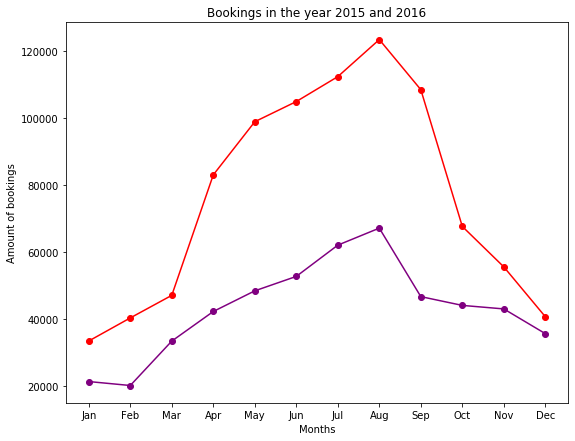

In [109]:
#this plot shows the bikes at the main train station that are leaving in violet and that are arriving in red
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(firstyear['month'],
        firstyear['BOOKING_HAL_ID'], '-o',
        color='purple')

ax.plot(secondyear['month'],
        secondyear['BOOKING_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Months",
       ylabel="Amount of bookings",
       title="Bookings in the year 2015 and 2016")
plt.show()

In [37]:
#this goes for both years
#furst get the dates
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')
booking_set.dropna()

booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]

booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [38]:
booking_set_frankfurt_20152016['DATE_UNTIL'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_UNTIL'])
booking_set_frankfurt_20152016['DATE_UNTIL'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt_20152016['DATE_FROM'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_FROM'])
booking_set_frankfurt_20152016['DATE_FROM'].dt.strftime('%Y-%m-%d %X')

4284612     2015-01-01 00:21:22
4285336     2015-01-01 00:30:20
4285873     2015-01-01 00:42:51
4286542     2015-01-01 01:00:19
4286567     2015-01-01 01:00:47
                   ...         
14613160    2016-12-31 23:13:00
14613511    2016-12-31 23:23:28
14612056    2016-12-31 23:24:03
14615815    2016-12-31 23:28:04
14612244    2016-12-31 23:40:33
Name: DATE_FROM, Length: 1431643, dtype: object

In [39]:
booking_set_frankfurt_20152016['duration'] = booking_set_frankfurt_20152016['DATE_UNTIL'] - booking_set_frankfurt_20152016['DATE_FROM']

In [40]:
#run this through multiple times by changing the minute count to get the hard coded result below
duration_oneminute = booking_set_frankfurt_20152016[booking_set_frankfurt_20152016.duration < '00:05:00']
print(duration_oneminute.shape)

(166839, 18)


Amount of bikes that are under certain amount of minutes duration:

Hardcoded result from before: 
1. 1 Minute: 5412
2. 2 Minutes: 21464
3. 3 Minutes: 44362
4. 4 Minutes: 94586
5. 5 Minutes: 166839

In [41]:
#same as before
duration_oneday = booking_set_frankfurt_20152016[booking_set_frankfurt_20152016.duration > '14 days 00:00:00']
print(duration_oneday.shape)

(94, 18)


Hardcoded: Amount of bikes that are over a certain amount of days duration:
1. 1 Day: 3115
2. 2 Days: 1159
3. 3 Days: 661
4. 4 Days: 440
5. Days: 323
6. Days: 239
7. Days: 198
8. Days: 162
9. Days: 146
10. Days: 136
11. Days: 125
12. Days: 109
13. Days: 98
14. Days: 94

In [42]:
booking_set_frankfurt_20152016['year'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_20152016['month'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_20152016['date'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_20152016['hour'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_20152016['Day_of_week'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%a')

In [43]:
booking_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour', 'duration']]
booking_duration

,BOOKING_HAL_ID,Day_of_week,hour,duration
4284612,27689006,Thu,00,0 days 00:03:56
4285336,27689041,Thu,00,0 days 00:11:32
4285873,27689080,Thu,00,0 days 00:25:58
4286542,27689151,Thu,01,0 days 00:11:00
4286567,27689154,Thu,01,0 days 00:10:33
...,...,...,...,...
14613160,43561784,Sat,23,1 days 09:08:32
14613511,43561828,Sat,23,0 days 00:22:31
14612056,43561832,Sat,23,0 days 00:08:47
14615815,43561863,Sat,23,0 days 00:05:21


In [44]:
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])
booking_duration_mean = booking_duration.groupby(["Day_of_week"], as_index = False)['duration'].mean()
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])
booking_duration_mean

,Day_of_week,duration
0,Fri,00:31:32.055644
1,Mon,00:35:32.290815
2,Sat,00:40:40.699059
3,Sun,00:38:56.724427
4,Thu,00:30:32.577930
5,Tue,00:30:19.203179
6,Wed,00:28:09.494671


In [45]:
#this is needed to sort the table after the days of the week
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
booking_duration_mean['Day_id'] = booking_duration_mean.index
booking_duration_mean['Day_id'] = booking_duration_mean['Day_of_week'].map(sorterIndex)
booking_duration_mean.sort_values('Day_id', inplace=True)

In [46]:
booking_duration_mean

,Day_of_week,duration,Day_id
1,Mon,00:35:32.290815,0
5,Tue,00:30:19.203179,1
6,Wed,00:28:09.494671,2
4,Thu,00:30:32.577930,3
0,Fri,00:31:32.055644,4
2,Sat,00:40:40.699059,5
3,Sun,00:38:56.724427,6


In [47]:
#round the time to make it better for plotting
booking_duration_mean['duration']  = round(booking_duration_mean['duration'].dt.total_seconds()/60)

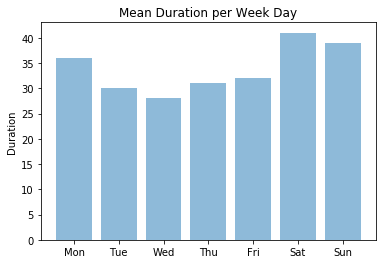

In [48]:
#plot for the mean duration per week day
y_pos = np.arange(len(booking_duration_mean['Day_of_week']))
plt.bar(y_pos, booking_duration_mean['duration'], align='center', alpha=0.5)
plt.xticks(y_pos, booking_duration_mean['Day_of_week'])
plt.ylabel('Duration')
plt.title('Mean Duration per Week Day')

plt.show()

In [49]:
#Now do the same for hours of the day

In [50]:
booking_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour', 'duration']]
booking_duration

,BOOKING_HAL_ID,Day_of_week,hour,duration
4284612,27689006,Thu,00,0 days 00:03:56
4285336,27689041,Thu,00,0 days 00:11:32
4285873,27689080,Thu,00,0 days 00:25:58
4286542,27689151,Thu,01,0 days 00:11:00
4286567,27689154,Thu,01,0 days 00:10:33
...,...,...,...,...
14613160,43561784,Sat,23,1 days 09:08:32
14613511,43561828,Sat,23,0 days 00:22:31
14612056,43561832,Sat,23,0 days 00:08:47
14615815,43561863,Sat,23,0 days 00:05:21


In [51]:
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])
booking_duration_mean = booking_duration.groupby(["hour"], as_index = False)['duration'].mean()
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])
booking_duration_mean

,hour,duration
0,00,00:34:40.516600
1,01,00:31:00.292446
2,02,00:29:12.395193
3,03,00:33:22.050675
4,04,00:39:12.001395
5,05,00:23:45.539140
6,06,00:20:14.509727
7,07,00:22:14.720363
8,08,00:21:27.503130
9,09,00:23:47.541462


In [52]:
booking_duration_mean['duration']  = round(booking_duration_mean['duration'].dt.total_seconds()/60)

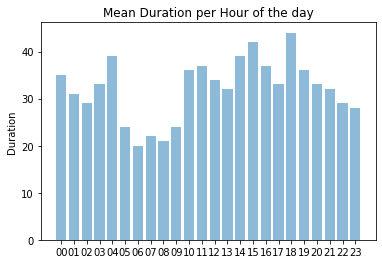

In [53]:
#plot for the mean duration per week day
y_pos = np.arange(len(booking_duration_mean['hour']))
plt.bar(y_pos, booking_duration_mean['duration'], align='center', alpha=0.5)
plt.xticks(y_pos, booking_duration_mean['hour'])
plt.ylabel('Duration')
plt.title('Mean Duration per Hour of the day')

plt.show()

# Routes

In [54]:
#use vehicle hal id to see how many vehicles are at one station at a time 
booking_set_frankfurt['VEHICLE_HAL_ID'].nunique()

3765

In [55]:
booking_set_frankfurt['VEHICLE_HAL_ID'].unique() #gives out the vehicle ids in array form 

array([115939, 116954, 119442, ..., 143849, 116546, 116745], dtype=int64)

In [79]:
#again change to the required dates
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [80]:
#set again a new table for the routes
booking_set_frankfurt_20152016['year'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_20152016['month'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_20152016['date'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_20152016['hour'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_20152016['Day_of_week'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%a')

In [81]:
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,year,month,date,hour,Day_of_week
4284612,27689006,50000,110326,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,Nein,Nein,0.0,...,NaN,12635.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,00,Thu
4285336,27689041,50000,115667,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,Nein,Nein,0.0,...,Beethovenstraße / Beethovenplatz,214393.0,Standort,Frankfurt am Main,IVR,2015,Jan,01,00,Thu
4285873,27689080,50000,116175,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,Nein,Nein,0.0,...,Im Prüfling / Throner Straße,231602.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,00,Thu
4286542,27689151,50000,110256,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,01,Thu
4286567,27689154,50000,116123,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,01,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14613160,43561784,50000,165502,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,Nein,Nein,0.0,...,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14613511,43561828,50000,164856,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,Nein,Nein,0.0,...,OLG (Zeil / Oberlandesgericht),226348.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14612056,43561832,50000,164045,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,Nein,Nein,0.0,...,Röderbergweg,254285.0,Standort,Frankfurt am Main,Android CAB,2016,Dec,31,23,Sat
14615815,43561863,50000,165498,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,Nein,Nein,0.0,...,Eschersheimer Landstraße / Grüneburgweg,227484.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat


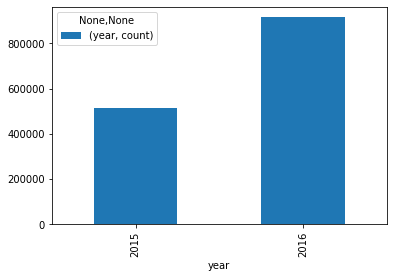

In [82]:
#a plot for the amount of bookings in the years 2015 and 2016
booking_set_frankfurt_20152016.groupby(['year']).agg({'year': ['count']}).plot(kind='bar')

In [59]:
#select the columns that you need for the start station
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]

In [60]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,Day_of_week,hour
4284612,27689006,Speyerer Straße / Koblenzer Straße,227726.0,110326,Thu,00
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,Thu,00
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,Thu,00
4286542,27689151,Markus-Krankenhaus,227460.0,110256,Thu,01
4286567,27689154,Markus-Krankenhaus,227460.0,116123,Thu,01
...,...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,Sat,23
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,Sat,23
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,Sat,23
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,Sat,23


In [61]:
booking_vehicle_start_two = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "Day_of_week"], as_index = False)['VEHICLE_HAL_ID'].count()

In [62]:
booking_vehicle_start_two

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,Fri,124
1,Ackermannstraße / Cordierstraße,Mon,113
2,Ackermannstraße / Cordierstraße,Sat,88
3,Ackermannstraße / Cordierstraße,Sun,93
4,Ackermannstraße / Cordierstraße,Thu,107
...,...,...,...
2244,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sat,96
2245,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sun,95
2246,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Thu,206
2247,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Tue,191


In [63]:
#select one of the stations and plot how many bikes there are over the course of the day 

In [64]:
#station to select: Hauptbahnhof Haupteingang (Vorplatz) 
vehicles_station = booking_vehicle_start_two[booking_vehicle_start_two['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]

In [65]:
vehicles_station

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
1108,Hauptbahnhof Haupteingang (Vorplatz),Fri,10985
1109,Hauptbahnhof Haupteingang (Vorplatz),Mon,9963
1110,Hauptbahnhof Haupteingang (Vorplatz),Sat,7251
1111,Hauptbahnhof Haupteingang (Vorplatz),Sun,8258
1112,Hauptbahnhof Haupteingang (Vorplatz),Thu,11367
1113,Hauptbahnhof Haupteingang (Vorplatz),Tue,11223
1114,Hauptbahnhof Haupteingang (Vorplatz),Wed,11950


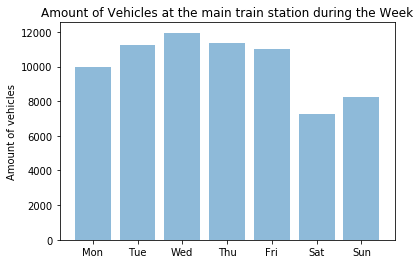

In [66]:
#als erstes wie viele sind über die Wochentage da als Plot
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
vehicles_station['Day_id'] = vehicles_station.index
vehicles_station['Day_id'] = vehicles_station['Day_of_week'].map(sorterIndex)
vehicles_station.sort_values('Day_id', inplace=True)
y_pos = np.arange(len(vehicles_station['Day_of_week']))
plt.bar(y_pos, vehicles_station['VEHICLE_HAL_ID'], align='center', alpha=0.5)
plt.xticks(y_pos, vehicles_station['Day_of_week'])
plt.ylabel('Amount of vehicles')
plt.title('Amount of Vehicles at the main train station during the Week')

plt.show()

In [67]:
#Plot the amount of vehicles at this station over the day
booking_vehicle_start_three = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour = booking_vehicle_start_three[booking_vehicle_start_three['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3620,Hauptbahnhof Haupteingang (Vorplatz),00,1911
3621,Hauptbahnhof Haupteingang (Vorplatz),01,1974
3622,Hauptbahnhof Haupteingang (Vorplatz),02,1431
3623,Hauptbahnhof Haupteingang (Vorplatz),03,867
3624,Hauptbahnhof Haupteingang (Vorplatz),04,486
3625,Hauptbahnhof Haupteingang (Vorplatz),05,500
3626,Hauptbahnhof Haupteingang (Vorplatz),06,1743
3627,Hauptbahnhof Haupteingang (Vorplatz),07,6790
3628,Hauptbahnhof Haupteingang (Vorplatz),08,7803
3629,Hauptbahnhof Haupteingang (Vorplatz),09,3978


In [68]:
vehicles_station_hour['VEHICLE_HAL_ID'].sum()

70997

In [69]:
#now also get leaving bikes for the following plot
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]
booking_vehicle_end_two = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour_end = booking_vehicle_end_two[booking_vehicle_end_two['END_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour_end

,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3690,Hauptbahnhof Haupteingang (Vorplatz),00,668
3691,Hauptbahnhof Haupteingang (Vorplatz),01,562
3692,Hauptbahnhof Haupteingang (Vorplatz),02,501
3693,Hauptbahnhof Haupteingang (Vorplatz),03,420
3694,Hauptbahnhof Haupteingang (Vorplatz),04,430
3695,Hauptbahnhof Haupteingang (Vorplatz),05,773
3696,Hauptbahnhof Haupteingang (Vorplatz),06,1814
3697,Hauptbahnhof Haupteingang (Vorplatz),07,2605
3698,Hauptbahnhof Haupteingang (Vorplatz),08,2811
3699,Hauptbahnhof Haupteingang (Vorplatz),09,2139


In [70]:
vehicles_station_hour_end['VEHICLE_HAL_ID'].sum()

70728

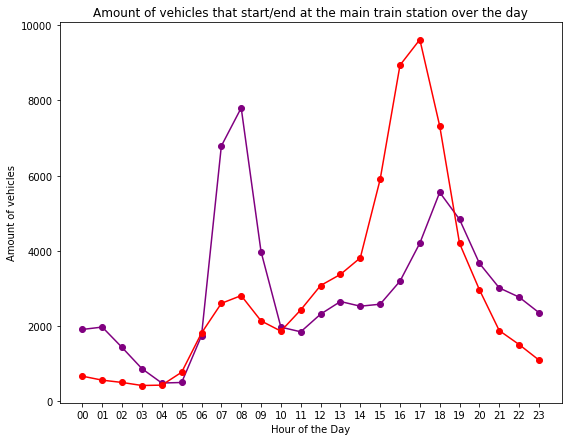

In [71]:
#this plot shows the bikes at the main train station that are leaving in violet and that are arriving in red
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicles_station_hour['hour'],
        vehicles_station_hour['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicles_station_hour_end['hour'],
        vehicles_station_hour_end['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Amount of vehicles that start/end at the main train station over the day")
plt.show()

In [72]:
#now these are total amounts lets see what the mean says

In [73]:
vehicle_start_count = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_start_count

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,7
1,Ackermannstraße / Cordierstraße,01,3
2,Ackermannstraße / Cordierstraße,02,3
3,Ackermannstraße / Cordierstraße,03,6
4,Ackermannstraße / Cordierstraße,04,4
...,...,...,...
7433,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,75
7434,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,60
7435,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,29
7436,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,21


In [74]:
vehicle_start_mean = vehicle_start_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_start_mean['VEHICLE_HAL_ID']  = round(vehicle_start_mean['VEHICLE_HAL_ID']) #rude Werte
vehicle_start_mean

,hour,VEHICLE_HAL_ID
0,00,69.0
1,01,62.0
2,02,46.0
3,03,32.0
4,04,20.0
5,05,23.0
6,06,55.0
7,07,192.0
8,08,324.0
9,09,203.0


In [75]:
#same for end
vehicle_end_count = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_end_count

,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,13
1,Ackermannstraße / Cordierstraße,01,16
2,Ackermannstraße / Cordierstraße,02,14
3,Ackermannstraße / Cordierstraße,03,9
4,Ackermannstraße / Cordierstraße,04,9
...,...,...,...
7502,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,66
7503,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,52
7504,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,41
7505,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,19


In [76]:
vehicle_end_mean = vehicle_end_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_end_mean['VEHICLE_HAL_ID']  = round(vehicle_end_mean['VEHICLE_HAL_ID']) #rude Werte
vehicle_end_mean

,hour,VEHICLE_HAL_ID
0,00,69.0
1,01,62.0
2,02,46.0
3,03,31.0
4,04,19.0
5,05,22.0
6,06,58.0
7,07,195.0
8,08,326.0
9,09,201.0


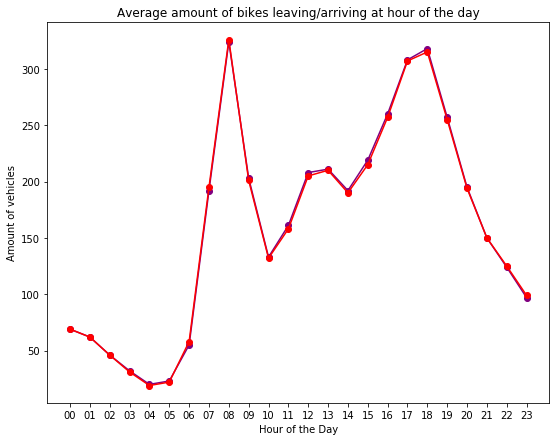

In [77]:
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicle_start_mean['hour'],
        vehicle_start_mean['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicle_end_mean['hour'],
        vehicle_end_mean['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Average amount of bikes leaving/arriving at hour of the day")
plt.show()

In [78]:
#so we see that this plot us relatively unteresting since the mean duration of the bookings is under an hour
#however we might look at a specific time interval closer

In [79]:
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'DATE_BOOKING']]

In [80]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING
4284612,27689006,Speyerer Straße / Koblenzer Straße,227726.0,110326,2015-01-01 00:21:22
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,2015-01-01 00:30:20
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,2015-01-01 00:42:51
4286542,27689151,Markus-Krankenhaus,227460.0,110256,2015-01-01 01:00:19
4286567,27689154,Markus-Krankenhaus,227460.0,116123,2015-01-01 01:00:47
...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,2016-12-31 23:13:00
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,2016-12-31 23:23:28
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,2016-12-31 23:24:03
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,2016-12-31 23:28:04


In [81]:
booking_vehicle_start['time'] = booking_vehicle_start['DATE_BOOKING'].dt.strftime('%X')

In [82]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,time
4284612,27689006,Speyerer Straße / Koblenzer Straße,227726.0,110326,2015-01-01 00:21:22,00:21:22
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,2015-01-01 00:30:20,00:30:20
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,2015-01-01 00:42:51,00:42:51
4286542,27689151,Markus-Krankenhaus,227460.0,110256,2015-01-01 01:00:19,01:00:19
4286567,27689154,Markus-Krankenhaus,227460.0,116123,2015-01-01 01:00:47,01:00:47
...,...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,2016-12-31 23:13:00,23:13:00
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,2016-12-31 23:23:28,23:23:28
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,2016-12-31 23:24:03,23:24:03
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,2016-12-31 23:28:04,23:28:04


In [83]:
booking_vehicle_start_2 = booking_vehicle_start.drop('DATE_BOOKING', axis=1)

In [84]:
booking_vehicle_start_3 = booking_vehicle_start_2.groupby(["START_RENTAL_ZONE", "time"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_4 = booking_vehicle_start_3[booking_vehicle_start_3['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_4

,START_RENTAL_ZONE,time,VEHICLE_HAL_ID
511383,Hauptbahnhof Haupteingang (Vorplatz),00:00:03,1
511384,Hauptbahnhof Haupteingang (Vorplatz),00:00:09,1
511385,Hauptbahnhof Haupteingang (Vorplatz),00:00:15,1
511386,Hauptbahnhof Haupteingang (Vorplatz),00:00:19,1
511387,Hauptbahnhof Haupteingang (Vorplatz),00:00:21,1
...,...,...,...
554830,Hauptbahnhof Haupteingang (Vorplatz),23:59:50,1
554831,Hauptbahnhof Haupteingang (Vorplatz),23:59:51,1
554832,Hauptbahnhof Haupteingang (Vorplatz),23:59:52,1
554833,Hauptbahnhof Haupteingang (Vorplatz),23:59:54,2


In [85]:
start = '07:00:00'
end = '10:00:00'
filters = (vehicles_station_4['time'] >= start) & (vehicles_station_4['time'] <= end)
vehicles_station_5 = vehicles_station_4.loc[filters]

In [86]:
vehicles_station_5

,START_RENTAL_ZONE,time,VEHICLE_HAL_ID
518309,Hauptbahnhof Haupteingang (Vorplatz),07:00:03,3
518310,Hauptbahnhof Haupteingang (Vorplatz),07:00:04,1
518311,Hauptbahnhof Haupteingang (Vorplatz),07:00:07,1
518312,Hauptbahnhof Haupteingang (Vorplatz),07:00:08,1
518313,Hauptbahnhof Haupteingang (Vorplatz),07:00:10,1
...,...,...,...
526612,Hauptbahnhof Haupteingang (Vorplatz),09:59:54,1
526613,Hauptbahnhof Haupteingang (Vorplatz),09:59:56,1
526614,Hauptbahnhof Haupteingang (Vorplatz),09:59:57,1
526615,Hauptbahnhof Haupteingang (Vorplatz),09:59:59,1


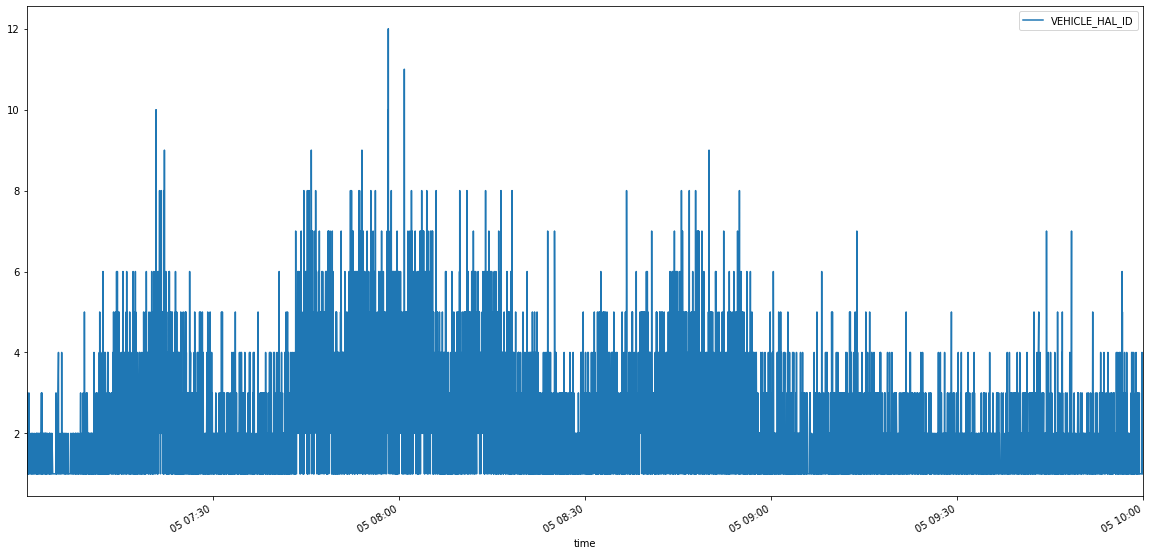

In [119]:
vehicles = vehicles_station_5.drop('START_RENTAL_ZONE', axis=1)
vehicles['time'] = pd.to_datetime(vehicles['time'])
vehicles2 = vehicles.set_index('time')
vehicles2.plot(figsize=(20,10))


# test remove if not enough time

In [34]:
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')
booking_set.dropna()
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]

In [35]:
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
4283826,27689463,50000,115995,76927C6491697C23CD3B97CE24437FD7CEBE5481,2015-01-01 02:17:50,2015-01-01 02:17:50,2015-01-01 02:34:03,Nein,Nein,0.0,Walter-Kolb-Straße / Elisabethenstraße,23844.0,Deutsche Bibliothek,231603.0,Standort,Frankfurt am Main,IVR
4283828,27689721,50000,115812,E75E5EB4FF54F0F727A31388983319AE4725EFE2,2015-01-01 03:09:24,2015-01-01 03:09:24,2015-01-01 03:33:20,Nein,Nein,0.0,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Westhafenplatz / Speicherstraße,214460.0,Standort,Frankfurt am Main,iPhone CAB
4283954,27689678,50000,116661,FC0A619734982FF985948D064E132270C1502624,2015-01-01 03:01:18,2015-01-01 03:01:18,2015-01-01 03:20:01,Nein,Nein,0.0,Börse,214382.0,Frankenallee / Schwalbacherstraße,214452.0,Standort,Frankfurt am Main,iPhone CAB
4284020,27689399,50000,116586,554A5F58F2E2CDCC40B83A6D979CA5D441AB22DB,2015-01-01 02:06:50,2015-01-01 02:06:50,2015-01-01 02:16:14,Nein,Nein,0.0,Leonardo-da-Vinci-Allee / Am Römerhof,226256.0,U-Bahn Station Leipziger Strasse,226255.0,Standort,Frankfurt am Main,iPhone CAB
4284255,27689589,50000,108277,02B44E65A12DCB51D5DDE0A0723D173D0DA2355A,2015-01-01 02:43:44,2015-01-01 02:43:44,2015-01-01 02:50:37,Nein,Nein,0.0,Taunusstraße / Gallusanlage,28951.0,Konstablerwache,135647.0,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615241,43560351,50000,164964,FDD419E118B7D98EE44F33E97314815AD884484D,2016-12-31 19:09:47,2016-12-31 19:09:47,2016-12-31 19:19:40,Nein,Nein,0.0,NaN,23749.0,NaN,23739.0,Standort,Frankfurt am Main,iPhone CAB
14615423,43559318,50000,164964,FDD419E118B7D98EE44F33E97314815AD884484D,2016-12-31 17:05:38,2016-12-31 17:05:38,2016-12-31 17:13:37,Nein,Nein,0.0,Sophienstraße / Ginnheimer Straße,227462.0,NaN,23749.0,Standort,Frankfurt am Main,iPhone CAB
14615446,43559432,50000,163537,F454116AB43FBD7C1E97A5DAFC0C27C887292AA7,2016-12-31 17:18:59,2016-12-31 17:18:59,2016-12-31 17:21:59,Nein,Nein,0.0,Haardtwaldplatz,254647.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
14615814,43561391,50000,164048,00E685961D113D2CD37B5A143BDFF746A51A149F,2016-12-31 21:48:42,2016-12-31 21:48:42,2016-12-31 22:08:13,Nein,Nein,0.0,Campus Westend Hörsaalzentrum,242521.0,NaN,12668.0,Standort,Frankfurt am Main,IVR


In [49]:
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'DATE_BOOKING']]

In [50]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING
4283826,27689463,Walter-Kolb-Straße / Elisabethenstraße,23844.0,115995,2015-01-01 02:17:50
4283828,27689721,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,115812,2015-01-01 03:09:24
4283954,27689678,Börse,214382.0,116661,2015-01-01 03:01:18
4284020,27689399,Leonardo-da-Vinci-Allee / Am Römerhof,226256.0,116586,2015-01-01 02:06:50
4284255,27689589,Taunusstraße / Gallusanlage,28951.0,108277,2015-01-01 02:43:44
...,...,...,...,...,...
14615241,43560351,NaN,23749.0,164964,2016-12-31 19:09:47
14615423,43559318,Sophienstraße / Ginnheimer Straße,227462.0,164964,2016-12-31 17:05:38
14615446,43559432,Haardtwaldplatz,254647.0,163537,2016-12-31 17:18:59
14615814,43561391,Campus Westend Hörsaalzentrum,242521.0,164048,2016-12-31 21:48:42


In [51]:
booking_vehicle_start['DATE_BOOKING'] = booking_vehicle_start["DATE_BOOKING"].str.split('[ |:|-]')

In [73]:
booking_vehicle_start.dtypes

BOOKING_HAL_ID                int64
START_RENTAL_ZONE            object
START_RENTAL_ZONE_HAL_ID    float64
VEHICLE_HAL_ID                int64
DATE_BOOKING                 object
dtype: object

In [75]:
#booking_vehicle_start.DATE_BOOKING.astype(int)

In [76]:
#booking_vehicle_start['DATE_BOOKING'] = pd.to_datetime(booking_vehicle_start["DATE_BOOKING"])
#booking_vehicle_start['DATE_BOOKING'] = pd.to_numeric(booking_vehicle_start["DATE_BOOKING"])

In [61]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING
4283826,27689463,Walter-Kolb-Straße / Elisabethenstraße,23844.0,115995,"[2015, 01, 01, 02, 17, 50]"
4283828,27689721,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,115812,"[2015, 01, 01, 03, 09, 24]"
4283954,27689678,Börse,214382.0,116661,"[2015, 01, 01, 03, 01, 18]"
4284020,27689399,Leonardo-da-Vinci-Allee / Am Römerhof,226256.0,116586,"[2015, 01, 01, 02, 06, 50]"
4284255,27689589,Taunusstraße / Gallusanlage,28951.0,108277,"[2015, 01, 01, 02, 43, 44]"
...,...,...,...,...,...
14615241,43560351,NaN,23749.0,164964,"[2016, 12, 31, 19, 09, 47]"
14615423,43559318,Sophienstraße / Ginnheimer Straße,227462.0,164964,"[2016, 12, 31, 17, 05, 38]"
14615446,43559432,Haardtwaldplatz,254647.0,163537,"[2016, 12, 31, 17, 18, 59]"
14615814,43561391,Campus Westend Hörsaalzentrum,242521.0,164048,"[2016, 12, 31, 21, 48, 42]"


In [66]:
numbers = booking_vehicle_start["DATE_BOOKING"].str.replace('[[\]]', '')

In [67]:
numbers

4283826    NaN
4283828    NaN
4283954    NaN
4284020    NaN
4284255    NaN
            ..
14615241   NaN
14615423   NaN
14615446   NaN
14615814   NaN
14615815   NaN
Name: DATE_BOOKING, Length: 1431643, dtype: float64

In [56]:
#booking_vehicle_start['DATE_BOOKING'] = booking_vehicle_start['DATE_BOOKING'].astype(str).astype(float)

In [4]:
import datetime
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    return '%i:%02i' % ((dt.hour + a) % 24, b)

In [6]:
print
timeround10(datetime.datetime(booking_vehicle_start['DATE_BOOKING']))

TypeError: an integer is required (got type DataFrame)

In [7]:
booking_vehicle_start.DATE_BOOKING.dtype

dtype('O')

#  test end

In [88]:
#select the columns that you need for the end station
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'Day_of_week', 'hour']]

In [89]:
#see the distribution of stations 
start_stations_busy = booking_set_frankfurt_20152016.groupby(booking_set_frankfurt_20152016['START_RENTAL_ZONE'], as_index=False).size()

In [90]:
start_stations_busy.nlargest(10)

START_RENTAL_ZONE
Hauptbahnhof Haupteingang (Vorplatz)            70997
Hauptbahnhof / Taxistand                        26816
Konstablerwache                                 24484
Pfarrer-Perabo-Platz / Kleyerstraße             23920
Campus Westend Hörsaalzentrum                   23797
Opernplatz / Bockenheimer Landstaße             20264
Carlo-Schmidt-Platz  / Depot                    20125
Roßmarkt / An der Hauptwache                    18853
Bockenheimer Landstraße / Liebigstraße          17982
Jürgen-Ponto-Platz / Neckarstraße (DB-Tower)    16881
dtype: int64

In [91]:
start_stations_busy.nsmallest(10)

START_RENTAL_ZONE
Commerzbank DLZ                          1
Commerzbankhochhaus                      1
BSC Repeater                             2
Commerzbank Gallileo                     9
Bechtenwaldstraße / Hahnbergweg         30
S-Bahn Station Farbwerke                37
BSC Grafittihalle                       48
Hans-Böckler-Straße / Geißspitzweg      50
Sindlinger Bahnstraße / Farbenstraße    59
Bahnhof Bieber / Poststraße             62
dtype: int64

In [92]:
#let's check the most used actual routes that we have, not just start and end stations, but the combinations of both
routes = booking_set_frankfurt.groupby(['START_RENTAL_ZONE','END_RENTAL_ZONE']).size().reset_index().rename(columns={0:'count'})
routes

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
0,Ackermannstraße / Cordierstraße,Ackermannstraße / Cordierstraße,135
1,Ackermannstraße / Cordierstraße,Ackermannstraße / Kleyerstraße,2
2,Ackermannstraße / Cordierstraße,Adam-Riese-Platz / Hafenstraße,3
3,Ackermannstraße / Cordierstraße,Adlerwerke Kleyerstrasse / Kriegkstrasse,9
4,Ackermannstraße / Cordierstraße,Affentorplatz,1
...,...,...,...
50922,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wiesenhüttenplatz,2
50923,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wilhelm-Leuschner-Straße/ Windmühlstraße,5
50924,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Woolworth Leipziger Strasse,3
50925,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Ziegelhüttenplatz / Ziegelhüttenweg,15


In [93]:
routes.sort_values(by=['count'])

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
25463,Idsteiner Straße / Schneidhainer Straße,Mannheimer Straße / Stuttgarter Straße,1
38731,Ruth-Mufang-Straße / Riedbergallee,Nußzeil / Josephskirchstraße,1
38729,Ruth-Mufang-Straße / Riedbergallee,Messe Haupteingang / Friedrich-Ebert-Anlage,1
38726,Ruth-Mufang-Straße / Riedbergallee,Markgrafenstraße / Leipziger Straße,1
38724,Ruth-Mufang-Straße / Riedbergallee,Leonardo-da-Vinci-Allee / Am Römerhof,1
...,...,...,...
35933,Pfarrer-Perabo-Platz / Kleyerstraße,Hauptbahnhof Haupteingang (Vorplatz),5269
24463,Hauptbahnhof Haupteingang (Vorplatz),Hauptbahnhof Haupteingang (Vorplatz),5751
35996,Pfarrer-Perabo-Platz / Kleyerstraße,S-Bahn Station Galluswarte / Mainzer Landstraße,5913
24234,Hauptbahnhof / Taxistand,Pfarrer-Perabo-Platz / Kleyerstraße,6861


## Section for open questions/problems/what might be mentioned in the afterthought

<p>There are some open questions regarding certain terms on the documentation which will be asked in German here since the documentation is in German:<p>
    Zur Buchungsdatei: Was genau bedeuten die Begriffe Sperrkunden (etwa ein Kunde, der gesperrt ist? Aber wie kann ein gesperrter Kunde eine Buchung durchführen? BLOCK_CUSTOMER_X soll ja gerade das aussagen), Quernutzung (etwa dass man mehrere Buchungen gleichzeitig laufen hat?), "statistik-relevant" (heißt das für uns, die Daten, die nicht statistik-relevant sind, sind für unsere Statistik nicht relevant?), Rahmenunterbuchung (wenn man auf eine bestimmte Zeit gebucht hat, aber da drunter liegt am Ende?) und Rahmenoberbuchung (das Gegenteil von vorher?) sowie Metastandort (die erste Station?)? 
   
Then don't forget to mention certain information: A person can book a bike up to 72 hours. A person can also book multiple bikes at the same time (up to 2 apparently). 